In [1]:
import json
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.plotting_tools as plot
import utils.qonversion_tools as qonvert
from utils.molecule_tools import get_molecule
import utils.cs_vqe_tools as cs_tools
from matplotlib import pyplot as plt
import numpy as np
from qiskit.aqua.components.optimizers import IMFIL, NELDER_MEAD, POWELL, NFT, SPSA, SLSQP

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


In [2]:
with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
    
model_data.keys()

dict_keys(['H2_3-21G_SINGLET', 'H6_STO-3G_SINGLET', 'H2_6-31G_SINGLET', 'H2_6-311G_SINGLET', 'H3+_STO-3G_SINGLET', 'H3+_3-21G_SINGLET', 'H3+_STO-3G_SINGLET_alt', 'HeH+_3-21G_SINGLET', 'HeH+_3-21G_SINGLET_alt', 'HeH+_6-311G_SINGLET', 'H2O_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET_alt', 'BeH+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'CH+_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'N+_STO-3G_SINGLET', 'OH+_STO-3G_SINGLET', 'CH2_STO-3G_SINGLET', 'BeH2_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'C_STO-3G_SINGLET'])

In [15]:
speciesname = "HF_STO-3G_SINGLET"
molecule    = model_data[speciesname]

ham         = molecule['ham']
uccsd       = molecule['uccsd']
hf_config   = molecule['hf_config']
num_qubits  = molecule['num_qubits']
terms_noncon= molecule['terms_noncon']

In [16]:
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian = ham,
                                  terms_noncon= terms_noncon,
                                  num_qubits  = num_qubits,
                                  hf_config   = hf_config)
num_sim_q = mol_circ.chem_acc_num_q

In [17]:
mol_circ.build_circuit(uccsd, num_sim_q).draw()

┌───┐                                                        »
q_0: ┤ X ├───■───────────────────────────────────────■────■───────»
     ├───┤ ┌─┴─┐                                   ┌─┴─┐  │       »
q_1: ┤ X ├─┤ X ├───■────────────────────────────■──┤ X ├──┼───────»
     └───┘ └───┘ ┌─┴─┐                        ┌─┴─┐└───┘┌─┴─┐     »
q_2: ────────────┤ X ├──■──────────────────■──┤ X ├─────┤ X ├──■──»
     ┌───┐┌─────┐├───┤┌─┴─┐┌────────────┐┌─┴─┐└───┘     └───┘┌─┴─┐»
q_3: ┤ X ├┤ Sdg ├┤ H ├┤ X ├┤ Rz(-P[20]) ├┤ X ├───────────────┤ X ├»
     └───┘└─────┘└───┘└───┘└────────────┘└───┘               └───┘»
«                                                                          »
«q_0: ─────────────────────■────────────────■───────────────────────────■──»
«                          │                │                           │  »
«q_1: ─────────────────────┼────────────────┼───────────────────────────┼──»
«                        ┌─┴─┐┌─────┐┌───┐┌─┴─┐                       ┌─┴─┐»
«q_2: ────────────────■──┤ X ├┤ Sdg ├┤ H ├┤ X ├──■─────────────────■──┤ X ├»
«     ┌────────────┐┌─┴─┐├───┤└┬───┬┘└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐└───┘»
«q_3: ┤ Rz(-P[15]) ├┤ X ├┤ H ├─┤ S ├───────────┤ X ├┤ Rz(-P[4]) ├┤ X ├─────»
«     └────────────┘└───┘└───┘ └───┘           └───┘└───────────┘└───┘     »
«                                                                          »
«q_0: ─────────────────────────────────────────────────────────────────────»
«                                                                          »
«q_1: ───────────────────────────────────────────■─────────────────────────»
«                              ┌───┐ ┌───┐┌───┐┌─┴─┐                       »
«q_2: ──■──────────────────■───┤ H ├─┤ S ├┤ H ├┤ X ├──■─────────────────■──»
«     ┌─┴─┐┌────────────┐┌─┴─┐┌┴───┴┐├───┤└───┘└───┘┌─┴─┐┌───────────┐┌─┴─┐»
«q_3: ┤ X ├┤ Rz(-P[14]) ├┤ X ├┤ Sdg ├┤ H ├──────────┤ X ├┤ Rz(-P[0]) ├┤ X ├»
«     └───┘└────────────┘└───┘└─────┘└───┘          └───┘└───────────┘└───┘»
«                                                       »
«q_0: ───────■─────────────────■────────────────■───────»
«            │                 │                │       »
«q_1: ──■────┼─────────────────┼────────────────┼───────»
«     ┌─┴─┐  │      ┌───┐      │  ┌─────┐┌───┐┌─┴─┐     »
«q_2: ┤ X ├──┼──────┤ H ├──────┼──┤ Sdg ├┤ H ├┤ X ├──■──»
«     └───┘┌─┴─┐┌───┴───┴───┐┌─┴─┐└┬───┬┘├───┤├───┤┌─┴─┐»
«q_3: ─────┤ X ├┤ Rz(-P[6]) ├┤ X ├─┤ H ├─┤ S ├┤ H ├┤ X ├»
«          └───┘└───────────┘└───┘ └───┘ └───┘└───┘└───┘»
«                                                                     »
«q_0: ───────────────────────────────────────■─────■──────────────────»
«                                            │   ┌─┴─┐                »
«q_1: ───────────────────────────────────────┼───┤ X ├────────────────»
«                                          ┌─┴─┐ ├───┤ ┌───┐┌───┐     »
«q_2: ──────────────────────────────────■──┤ X ├─┤ H ├─┤ S ├┤ H ├──■──»
«     ┌──────────────────────────────┐┌─┴─┐├───┤┌┴───┴┐├───┤└───┘┌─┴─┐»
«q_3: ┤ Rz(2.30576097609744e-7*P[6]) ├┤ X ├┤ H ├┤ Sdg ├┤ H ├─────┤ X ├»
«     └──────────────────────────────┘└───┘└───┘└─────┘└───┘     └───┘»
«                                                                         »
«q_0: ──────────────────────────────────────────────────■────■────────────»
«                                                     ┌─┴─┐┌─┴─┐          »
«q_1: ──────────────────────────■──────────────────■──┤ X ├┤ X ├──■───────»
«                        ┌───┐  │     ┌─────┐      │  ├───┤└───┘┌─┴─┐     »
«q_2: ────────────────■──┤ H ├──┼─────┤ Sdg ├──────┼──┤ H ├─────┤ X ├──■──»
«     ┌────────────┐┌─┴─┐└───┘┌─┴─┐┌──┴─────┴───┐┌─┴─┐├───┤┌───┐├───┤┌─┴─┐»
«q_3: ┤ Rz(-P[13]) ├┤ X ├─────┤ X ├┤ Rz(-P[12]) ├┤ X ├┤ H ├┤ S ├┤ H ├┤ X ├»
«     └────────────┘└───┘     └───┘└────────────┘└───┘└───┘└───┘└───┘└───┘»
«                                                                          »
«q_0: ──────────────────────────────────────────────■─────■────────────────»

*   Performing 4-qubit CS-VQE over qubit positions 3, 2, 1, 0 ...


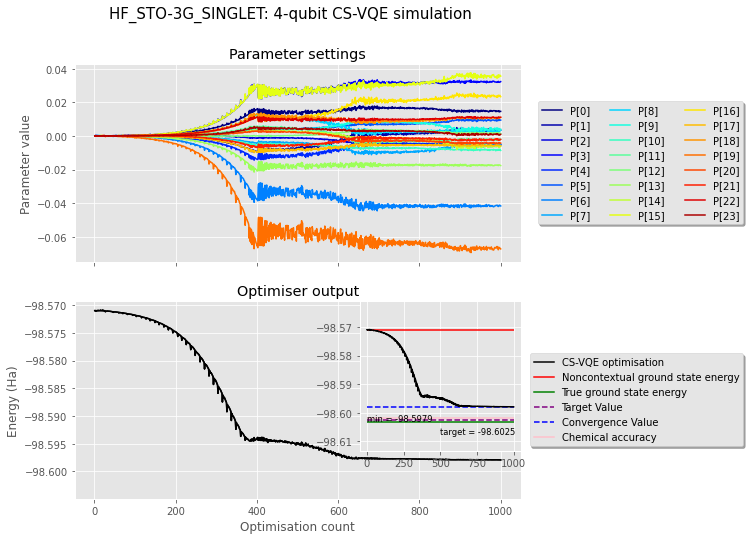

In [20]:
cs_vqe_results = mol_circ.CS_VQE(anz_terms=uccsd, 
                                 num_sim_q=num_sim_q, 
                                 optimizer=NELDER_MEAD(maxiter=10000), 
                                 param_bound=np.pi,
                                 noise=False)

title = '%s: %i-qubit CS-VQE simulation' % (speciesname, num_sim_q)
fig = plot.plot_parameter_settings(cs_vqe_results, title=title)